In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries imported successfully")

All libraries imported successfully


### Exploratory Data Analysis(EDA)

In [71]:
df = pd.read_csv('customer churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replacing blanks with 0 as tenure is 0  and no total charges are recorded 

In [12]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")



In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [73]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
df["customerID"].duplicated().sum()

np.int64(0)

 CONVERTED 0 and 1 values of Seniorcitizen column to YES/NO to make it easier to understand

In [18]:
def convert(val):
    if val == 1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(convert) # convert function apply on SeniorCitizen column 

In [76]:
df.head(25)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


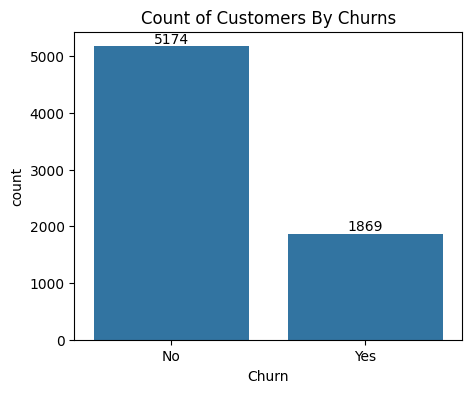

In [78]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x ='Churn', data = df)
ax.bar_label(ax.containers[0]) # 0 is a index 
plt.title("Count of Customers By Churns")
plt.show()


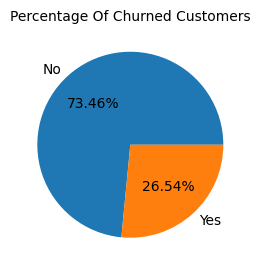

In [21]:
plt.figure(figsize = (3,4))
gp = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gp['Churn'], labels = gp.index , autopct = "%1.2f%%")
plt.title("Percentage Of Churned Customers", fontsize = 10)
plt.show()

### From the pie chart we can conclude that 26.54% of customers have churned out  
Now let's explore the reason behind it.


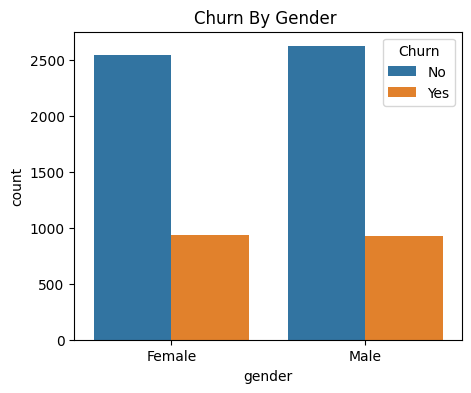

In [22]:
plt.figure(figsize = (5,4))
sns.countplot( x = df["gender"] , data = df , hue = "Churn")
plt.title("Churn By Gender ")
plt.show()

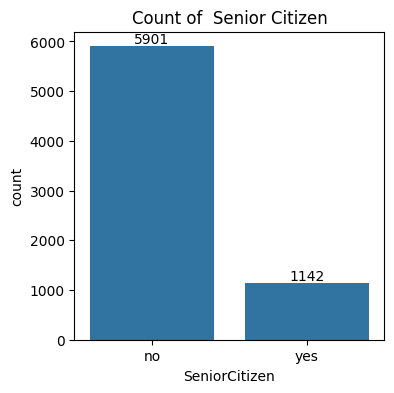

In [31]:
plt.figure(figsize=(4,4))
ax = sns.countplot( data = df , x= "SeniorCitizen")
ax.bar_label(ax.containers[0])
plt.title("Count of  Senior Citizen")
plt.show()

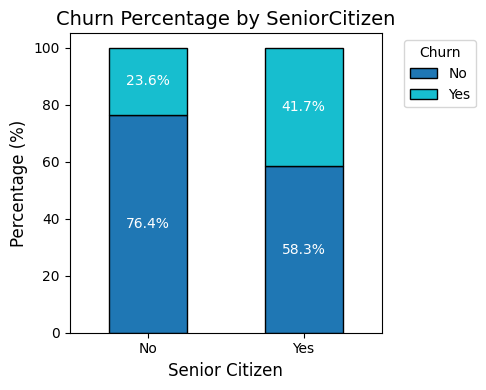

In [86]:
# Calculate percentages
senior_churn = ( df.groupby(['SeniorCitizen', 'Churn']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack())

# Ensure index values are exactly 'No' and 'Yes'
senior_churn.index = senior_churn.index.map({'no': 'No', 'yes': 'Yes', 0: 'No', 1: 'Yes'})

# Plot as stacked bar chart
ax = senior_churn.plot( kind='bar', stacked=True, figsize=(5,4), colormap='tab10',edgecolor='black')

# Titles and labels
plt.title("Churn Percentage by SeniorCitizen", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("Senior Citizen", fontsize=12)

# Add percentage labels
for i, row in enumerate(senior_churn.values):
    cum_val = 0
    for j, val in enumerate(row):
        ax.text(i, cum_val + val/2, f"{val:.1f}%", ha='center', va='center', color='white', fontsize=10)
        cum_val += val

# Legend and final adjustments
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(len(senior_churn.index)), labels=['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()


#Comparative a greater percentage of people in citizen category have chured

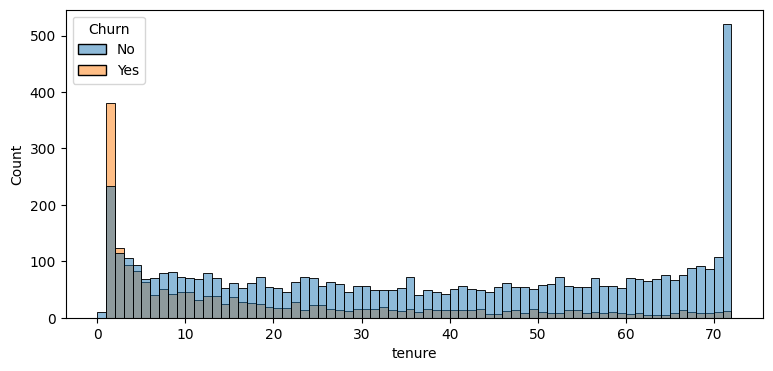

In [43]:
plt.figure(figsize=(9,4))
sns.histplot( x = 'tenure' , data = df , bins = 72 , hue = 'Churn')
plt.show()

people who have used our services for a long time have stayed and people who have used our services #1 or#2 months have churned

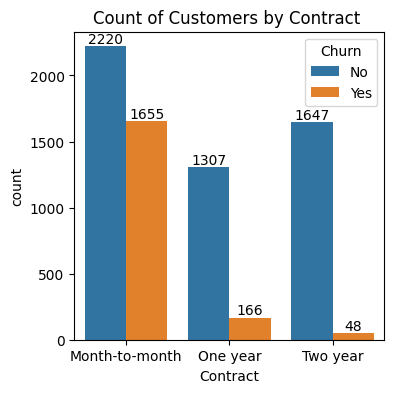

In [87]:
plt.figure(figsize=(4,4))
ax = sns.countplot( data = df , x= "Contract" , hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Contract ")
plt.show()

 people who have month to month contract are likely to churn then from those who have #1 or #2 years contract  

In [49]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

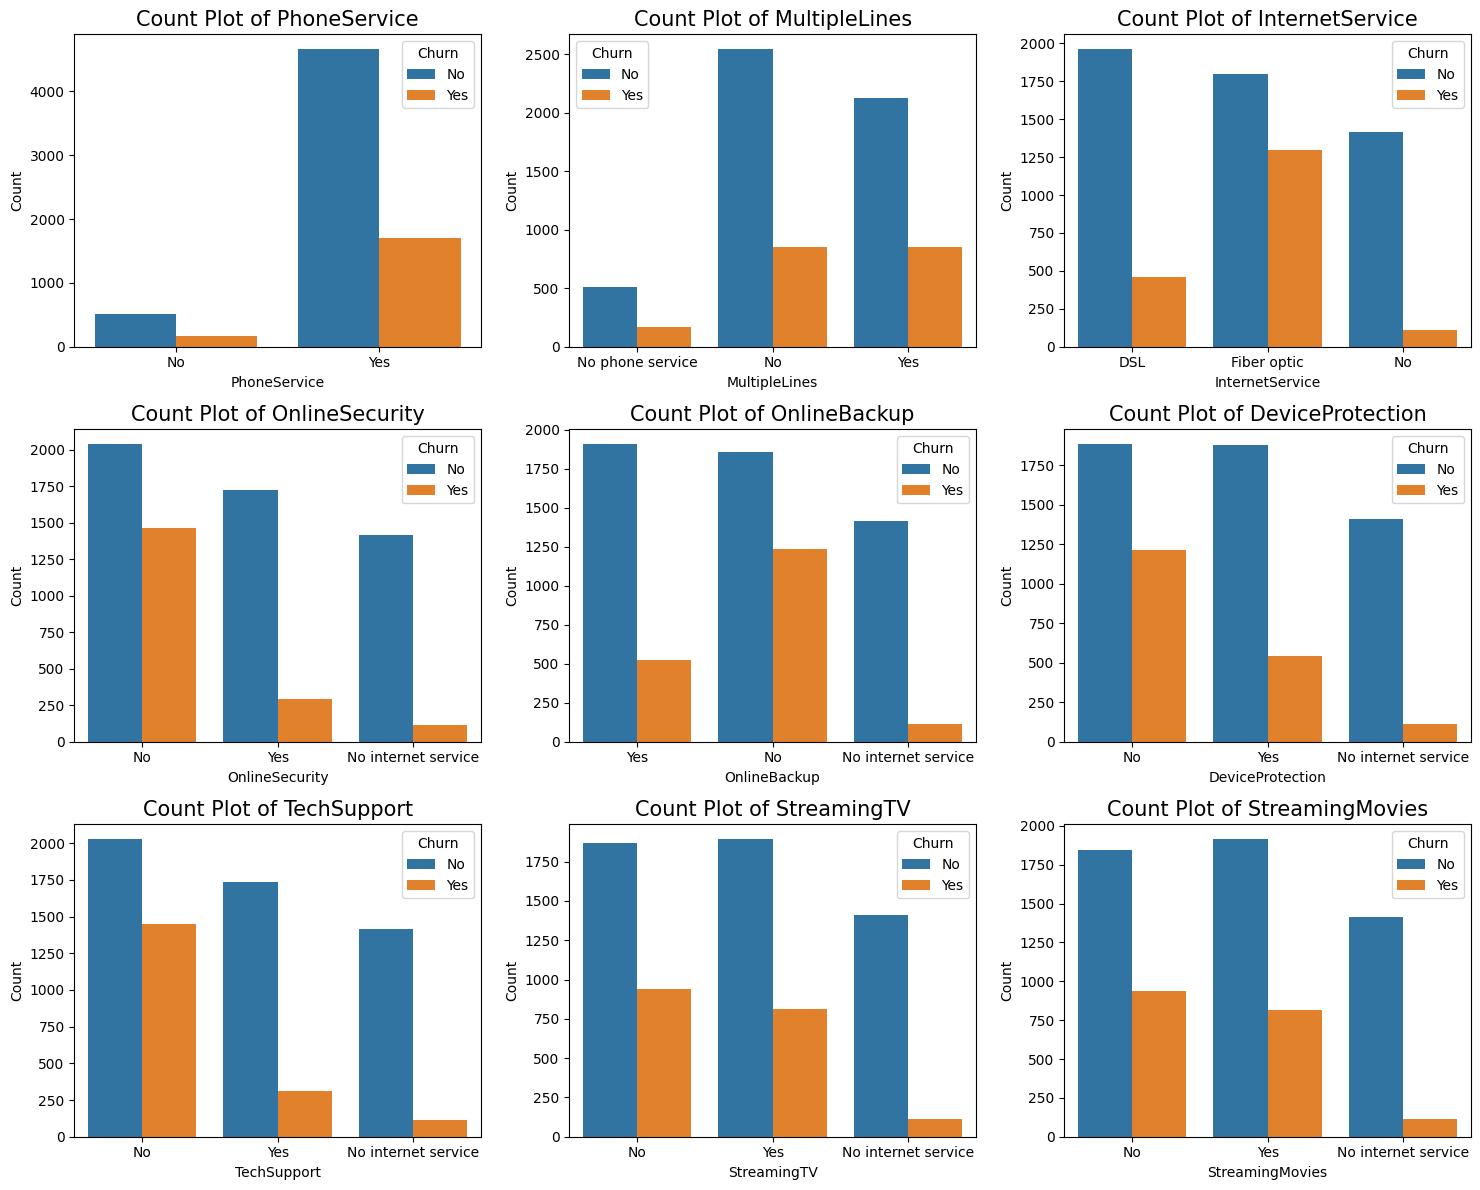

In [58]:
# List of columns for which we want to create count plots
columns = [ 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns in the subplot grid
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols #Calculate number of rows needed automatically

# Create subplots (figsize can be adjusted as needed)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten the axes array for easy iteration ( handle both 1D and 2D arrays )
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i] , hue = 'Churn')
    axes[i].set_title(f'Count Plot of {col}' , fontsize = 15)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots ( if any )
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()



The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

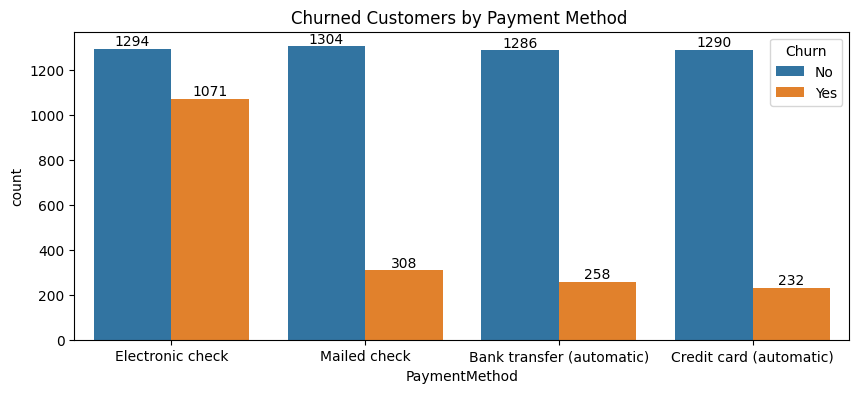

In [68]:
plt.figure(figsize=(10,4))
ax = sns.countplot( data = df , x= "PaymentMethod" , hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method ")
plt.show()

 Customers is likely churn when they are using electronic check as a Payment method.